# Machine Learning
## **Seminar Session 2**: Logistic Linear Classifiers and Gradient Descent

The goals of this lab are the following:

*   To review logistic linear classifiers
*   To implement gradient descent and analyze its convergence
*   To get practical experience using LLC on a real-world dataset
*   To implement stochastic gradient descent (SGD)
*   To analyze the dependence between the behavior of SGD and the batch size

**Note**: *In this session we will be assuming that the bias term of a linear classifier is included in the vector of weights $\mathbf{w}$. If necessary, you will need to augment the input data with one extra dimension in the first position with a constant value of $1$ accordingly.*

# Logistic Linear Classifiers, also known as Logistic Regression (LR)

## Review

Logistic Linear Classifiers is a probabilistic model for addressing supervised learning tasks. We will consider **binary** classification tasks.

Components:
- **Data set** of $N$ input/output pairs $\{(\mathbf{x}^{(n)}, y^{(n)})\}_{n=1}^N$, for which the inputs are vectors $\mathbf{x}^{(n)} = [x^{(n)}_1,x^{(n)}_2,...,x^{(n)}_D]^\top$. For Binary LR, there is one output $y^{(n)} \in [0,1]$ per input. For clarity, we will omit the superindex $(n)$ when possible.

- **Hypothesis class** (or model) that computes $\hat{y}$ (estimated class probability). The **sigmoid function** $\sigma(\cdot)$ is used in binary classification tasks. The output represents the probability of the data point belonging to class $1$. $$\hat{y}=f(\mathbf{x};\mathbf{w}) = \sigma(\mathbf{w}^\top\mathbf{x}) = \frac{1}{1+e^{-\mathbf{w}^\top\mathbf{x}}}.$$

- **Objective function** to be minimized: in this case, we consider the regularized *Negative log-Likelihood (NLL)*, also known as regularized *Cross-Entropy Error*. For binary classification tasks:

$$J_\mathcal{D}(\mathbf{w}) = \underbrace{-\frac{1}{N}\sum_{n=1}^{N}y^{(n)}\ln \hat{y}^{(n)}+(1-y^{(n)})\ln(1-\hat{y}^{(n)})}_{\text{training error } \mathcal{E}_\mathcal{D}(\mathbf{w})} + \frac{\lambda}{2}\underbrace{\|\mathbf{w}\|^2}_\text{regularizer}.$$
$\qquad$ Note that we have replaced the constant $\lambda$ with $\lambda/2$ for convenience.

- **Optimization algorithm**. We will use gradient descent. For that, we need the gradient of the objective with respect to the parameters $\nabla_\mathbf{w}J_\mathcal{D}(\mathbf{w})$. This is a function which will be evaluated during each step in the optimization.

$$\nabla_\mathbf{w} J_\mathcal{D}(\mathbf{w}^{(t-1)}) = \frac{1}{N}\sum_{n=1}^{N}\left(\hat{y}^{(n)}-y^{(n)}\right)\mathbf{x}^{(n)} + \lambda \mathbf{w}.$$

## Gradient Descent (for binary classification tasks)
---
**Input**:
- Dataset $\mathcal{D}=\{(\mathbf{x}^{(n)}, y^{(n)})\}_{n=1}^N$
- Objective $J_\mathcal{D}(\mathbf{w})$
- Gradient $\nabla_\mathbf{w} J_\mathcal{D}(\mathbf{w})$
- Learning rate $\eta>0$
- Convergence threshold $\epsilon>0$. \\

*(assuming $\mathbf{w}$ contains all parameters)*

$\mathbf{w}^{(0)} \leftarrow \mathbf{w}_\text{init}$. *(Initialize weights)* \\
$t \leftarrow 0$

**repeat**
> $t \leftarrow t+1$ \\
> $\nabla_\mathbf{w} J_\mathcal{D}(\mathbf{w}^{(t-1)}) \leftarrow \frac{1}{N}\sum_{n=1}^{N}\left(\hat{y}^{(n)}-y^{(n)}\right)\mathbf{x}^{(n)} + \lambda \mathbf{w}$. *(Compute gradient at $\mathbf{w}^{(t-1)}$)* \\
> $\mathbf{w}^{(t)} \leftarrow \mathbf{w}^{(t-1)} - \eta \nabla_\mathbf{w} J_\mathcal{D}(\mathbf{w}^{(t-1)})$. *(Update weights)* \\

**until** $|J_\mathcal{D}(\mathbf{w}^{(t)})-J_\mathcal{D}(\mathbf{w}^{(t-1)})|<\epsilon  $ \\
**return** $\mathbf{w}^{(t)}$.

---

In [ ]:
# Auxiliary functions

def plot_1D_data(pos,neg,xlim=(-5,5),ylim=(-5,5)):
  plt.grid(color=[.9,.9,.9])
  plt.scatter(pos,np.zeros(pos.size),s=100,c='b',marker='+')
  plt.scatter(neg,np.zeros(pos.size),s=100,c='r',marker='_')
  plt.xlim(xlim)
  plt.ylim(ylim)
  plt.xlabel('$x_1$')

def plot_2D_data(pos,neg,xlim=(-5,5),ylim=(-5,5)):
  plt.grid(color=[.9,.9,.9])
  plt.scatter(pos[:,0],pos[:,1],s=100,c='b',marker='+')
  plt.scatter(neg[:,0],neg[:,1],s=100,c='r',marker='_')
  plt.xlim(xlim)
  plt.ylim(ylim)
  plt.xlabel('$x_1$')
  plt.ylabel('$x_2$')

def plot_2D_data_unsup(X,xlim=(-5,5),ylim=(-5,5),xlabel='$x_1$',ylabel='$x_2$',color='b',label=''):
  plt.grid(color=[.9,.9,.9])
  plt.scatter(X[:,0],X[:,1],s=100,c=color,marker='o',label=label)
  plt.xlim(xlim)
  plt.ylim(ylim)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)

def plot_2D_plane(w,w0,xlim,ylim):
  xx = np.linspace(xlim[0],xlim[1],100)
  l1 = plt.plot(xx, -w[0]/w[1]*xx -w0/w[1], label='hyperplane')
  plt.grid(color=[.9,.9,.9])
  d = -w0/np.linalg.norm(w)
  o = w/np.linalg.norm(w) * -w0/np.linalg.norm(w);
  xx2 = np.linspace(0,o[0],10)
  yy2 = np.linspace(0,o[1],10)
  label = "$d=-w_0/|\mathbf{w}|=%.2f$" % d
  l2 = plt.plot(xx2,yy2,'--',label=label)
  l3 = plt.arrow(o[0], o[1], w[0], w[1], head_width=.1, label='$\mathbf{w}$')
  plt.xlabel('$x_1$')
  plt.ylabel('$x_2$')
  plt.axis('square')
  ax = plt.gca()
  ax.set_xticks(range(xlim[0],xlim[1]))
  ax.set_yticks(range(ylim[0],ylim[1]))
  plt.xlim(xlim)
  plt.ylim(ylim)

## Implementing Gradient Descent

We now will code the implementation of binary logistic regression using gradient descent. If you want to check the intuition behind gradient descent check, you can play this game: https://www.i-am.ai/gradient-descent.html


### Binary Logistic Regression Gradient Descent Algorithm

- check the structure of the following code and take some time to understand it. You need to add a bit of code in three places:

1.   In the method `cross_entropy_error`
2.   In the method `gradient`
3.   In the method `fit`

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
import pandas as pd
from scipy.special import expit as sigmoid
from google.colab import files
import time

# First PART

In [ ]:
class my_GDClassifier():
    """
    Logistic Regression implemented with Gradient Descent.
    """

    def __init__(self, add_bias = True, lam = 0, max_iter = 1000, eps = 1e-8, eta = 1e-2):
        """
        Creates an instance of our my_GDClassifier model

        Parameters
        ----------
        max_iter: maximun number of iteration if convergence is not achieved.
        eps: sets the convergence criterion.
        eta: learning rate or step size.
        lam: weight controlling the regularizer, or lambda.
        """
        self.add_bias = add_bias
        self.lam = lam
        self.max_iter = max_iter
        self.eps = eps
        self.eta = eta
        self.nb_iter = 1
        self.training_error = np.array([])
        self.n_samples = 0
        self.n_features = 0
        if add_bias:
          self.w = np.zeros([1, self.n_features + 1])[0]
        else:
          self.w = np.zeros([1, self.n_features])[0]

    def cross_entropy_error(self, X, y, w):
        """
        Computes the Cross-Entropy Loss Function
        Assumes bias is included in w

        Parameters
        ----------
        X: ndarray, shape (n_samples, n_features)
            The training set.
            n_samples == number of points in the dataset.
            n_features == dimension of the points.

        y: ndarray, shape (n_samples,)
            The class of each point (0: negative, 1: positive).
            n_samples == number of points in the dataset.

        w: ndarray, shape(1, n_features)

        Returns
        -------
        error: integer,
                The Cross-Entropy Loss
        """
        loglik = 0
        for n in range(X.shape[0]):
            yhat = sigmoid(w@X[n,:])

            # TODO
            # compute negative log-likelihood / cross-entropy error for this point
            loglik_n = y[n]*np.log(yhat+1e-9)+(1-y[n])*np.log(1-yhat+1e-9)
            # Note: the 1e-9 is added to avoid numerical errors

            loglik += loglik_n

        return -loglik/X.shape[0] + self.lam/2 * np.power(np.linalg.norm(w),2)

    def gradient(self, X, y, w):
        """
        Computes the gradient of the objective function at point w using data set (X, y)
        Assumes Cross-Entropy and binary logistic regression model
        Assumes bias is included in w

        Parameters
        ----------
        X: ndarray, shape (n_samples, n_features)
            The training set.
            n_samples == number of points in the dataset.
            n_features == dimension of the points.

        y: ndarray, shape (n_samples,)
            The class of each point (0: negative, 1: positive).
            n_samples == number of points in the dataset.

        w: ndarray, shape(1, n_features)

        Returns
        -------
        grad: ndarray, shape (1, n_features)
                The gradient of the Cross-Entropy Loss Function
        """

        #initialize gradient
        grad = np.zeros([self.n_features+1])

        for n in range(X.shape[0]):
            yhat = sigmoid(w@X[n,:])

            gradient_n = (yhat-y[n])*X[n,:]
            grad += gradient_n

        return grad/X.shape[0] + self.lam*w

    def fit(self, X, y):
        """
        Fit our Logistic Regression model to the data set (X, y)

        Parameters
        ----------
        X: ndarray, shape (n_samples, n_features)
            The training set.
            n_samples == number of points in the dataset.
            n_features == dimension of the points.
        y: ndarray, shape (n_samples,)
            The class of each point (0: negative, 1: positive).
            n_samples == number of points in the dataset.

        Returns
        -------
        self: logReg
               The Logistic Regression model trained on (X, y).
        """
        self.n_samples = X.shape[0]
        self.n_features = X.shape[1]
        if self.add_bias:
          X = np.hstack([np.ones((self.n_samples,1)),X])  # add dummy input
          self.w = np.random.randn(self.n_features + 1)
        else:
          self.w = np.random.randn(self.n_features)

        convergence = False  # start with cond greater than eps
        prev_error = np.Inf
        while (not convergence) and (self.nb_iter < self.max_iter):
            w_old = self.w

            #update weights
            self.w = w_old - self.eta*self.gradient(X, y, self.w)

            #compute cross entropy error for this iteration and save it
            error = self.cross_entropy_error(X, y, self.w)

            self.training_error = np.append(self.training_error, error)
            self.nb_iter += 1

            #check convergence condition
            convergence = abs(error - prev_error) < self.eps
            prev_error = error

        return self

    def predict(self, X):
        """
        Predict the classes of points in X.

        Parameters
        ----------
        X: ndarray, shape (n_samples, n_features)
            The set of points whose classes are to predict.
            n_samples == number of points in the dataset.
            n_features == dimension of the points.
        Returns
        -------
        predictions: ndarray, shape (n_samples)
                      The predicted classes.
                      n_samples == number of points in the dataset.
        """
        if self.add_bias:
          X = np.hstack([np.ones((X.shape[0],1)),X])

        # return prediction of the model for given X data points
        prediction = np.reshape(sigmoid(self.w@X.T) > 0.5,(-1,))
        return prediction

    def score(self, X, y):
        """
        Compute the accuracy of the classifier on the set X, provided the ground-truth y.

        Parameters
        ----------
        X: ndarray, shape (n_samples, n_features)
            The set of points on which to compute the score.
            n_samples == number of points in the dataset.
            n_features == dimension of the points (e.g. each sample is in R^2).
        y: ndarray, shape (n_samples,)
            The ground-truth of the labels.
            n_samples == number of points in the dataset.
        Returns
        -------
        score: float
                Accuracy of the classifier.
        """
        if self.training_error.size == 0:
          print('train first!')
          return -1
        else:
          return np.mean(self.predict(X) == y)

Let's see a simple example, you can use it to test if the code is working well


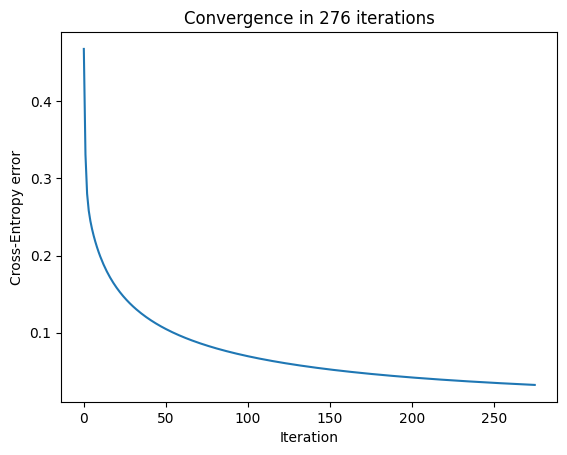

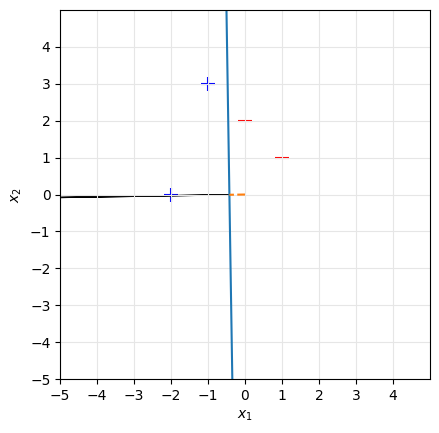

The accuracy of the logistic regression is 1.0


In [ ]:
# Four points
X = np.array([[-1,3],[-2,0],[0,2],[1,1]])
y = np.array([1,1,0,0])
pos_data = [0,1]
neg_data = [2,3]

clf = my_GDClassifier(eps = 0.0001, max_iter = 1000, eta = 0.5, lam = 0)
clf.fit(X, y)

plt.title(f'Convergence in {clf.training_error.size} iterations')
plt.plot(clf.training_error)
plt.xlabel('Iteration')
plt.ylabel('Cross-Entropy error')
xlim = (-5,5)
ylim = (-5,5)
plt.show()

w = clf.w
plot_2D_data(X[pos_data,:],X[neg_data,:],xlim=xlim,ylim=ylim)
plot_2D_plane(w[1:],w[0],xlim,ylim)
plt.show()

print(f'The accuracy of the logistic regression is {clf.score(X,y)}')


**Q1:** How many iterations does it take for converegence for `eps = 0.0001, max_iter = 1000, eta = 0.5, lam = 0`?

- In less than 300 iterations, depending on the initialization

**Q2:** We now set the value of $\eta = 0.01$ (`eta = 0.01`). How many iterations does it take for converegence?

- In this case, the learning rate is too small and the algorithm appears to converge, either because value of $\epsilon$ is too large or the maxium number of iterations is reached. We need to set $\epsilon$ much smaller than $\eta$ or increase `max_iter`.

**Q3:** We now consider the same parameters as is **Q1** but set the value of $\lambda = 0.1$ (`lam = 0.1`). Does it converge faster or slower? Why? What can you say about the value of the error?

- Faster, due to the regularization the error surface is better behaved.
- The error of the regularized solution is *higher*, since we are not only minimizing the training error, but also penalizing undesired solutions.

**Q4:** What can you say if you compare the magnitude of the vector $\mathbf{w}$ (black arrow) for different values of $\lambda=\{0,0.1\}$?

- The norm of the vector $\mathbf{w}$ is higher in the non-regularized case. This is because the objective function does not penalized solutions with large norm.

Now consider this other dataset, which is very similar, but with one data point different.

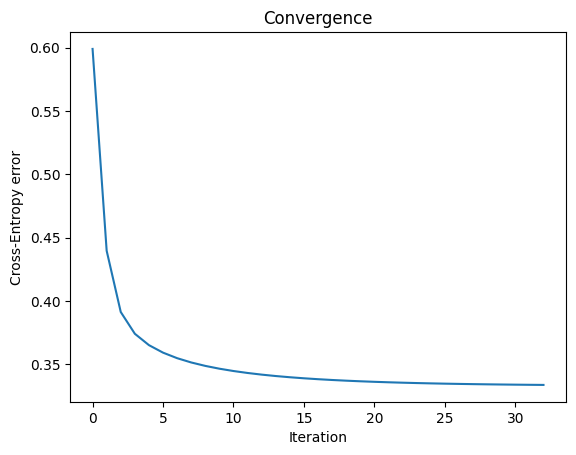

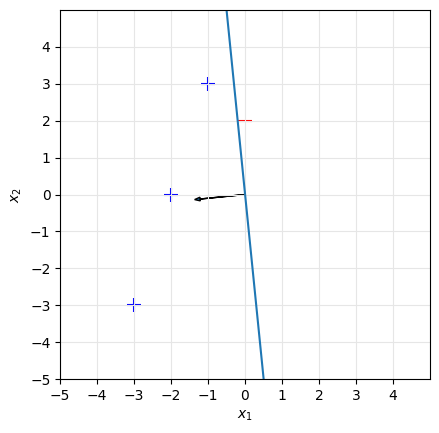

The accuracy of the logistic regression is 1.0


In [ ]:
# Try with this other similar dataset
# Illustrates that LR does not maximize the margin
X = np.array([[-1,3],[-2,0],[0,2],[-3,-3]])
y = np.array([1,1,0,1])
pos_data = [0,1,3]
neg_data = [2]

clf = my_GDClassifier(eps = 0.0001, max_iter = 1000, eta = 0.5, lam = 0.1)
clf.fit(X, y)

plt.title('Convergence')
plt.plot(clf.training_error)
plt.xlabel('Iteration')
plt.ylabel('Cross-Entropy error')
xlim = (-5,5)
ylim = (-5,5)
plt.show()

w = clf.w
plot_2D_data(X[pos_data,:],X[neg_data,:],xlim=xlim,ylim=ylim)
plot_2D_plane(w[1:],w[0],xlim,ylim)
plt.show()

print(f'The accuracy of the logistic regression is {clf.score(X,y)}')




**Q5:** What can you say about the margin of the dataset with respect to the obtained classifier? Does a logistic linear classifier trained with gradient descent maximize the margin?

- The margin is **not maximized**. Logistic regression tries to maximize the probability of each datapoint beloning to one of the classes. In this case, the dataset is unbalanced causing the resulting hyperplane to be oriented in this way. Note that we cannot fix this just adding regularization. In this course we will not look at methods that find maximum margin separating hyperplanes.

# PART 2
## Revisiting the Titanic Dataset

We will work with the same dataset used in the previous session: **Titanic - Machine Learning from Disaster** Dataset from the following kaggle competition : https://www.kaggle.com/competitions/titanic/data.

You should upload to the Google Colab session the file `train.csv` from the Aula Global. We start by reading the file, we can use the `read_csv` method to obtain a `Dataframe` a Python object containing the content of the `csv` file. We can use the `head` method to see the first rows of the data.

In [ ]:
!wget https://raw.githubusercontent.com/aig-upf/public-ml-course-undergrads/main/P01/gender_submission.csv
!wget https://raw.githubusercontent.com/aig-upf/public-ml-course-undergrads/main/P01/test.csv
!wget https://raw.githubusercontent.com/aig-upf/public-ml-course-undergrads/main/P01/train.csv

train = pd.read_csv('train.csv')
train.rename(columns = {'Sex':'Gender'},inplace=True)
train['Gender'].replace('male', 'man', inplace=True)
train['Gender'].replace('female', 'woman', inplace=True)
train.head()

--2024-04-30 18:06:32--  https://raw.githubusercontent.com/aig-upf/public-ml-course-undergrads/main/P01/gender_submission.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3258 (3.2K) [text/plain]
Saving to: ‘gender_submission.csv.1’

gender_submission.c 100%[===================>]   3.18K  --.-KB/s    in 0s      

2024-04-30 18:06:33 (55.7 MB/s) - ‘gender_submission.csv.1’ saved [3258/3258]

--2024-04-30 18:06:33--  https://raw.githubusercontent.com/aig-upf/public-ml-course-undergrads/main/P01/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting respo

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",man,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",woman,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",woman,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",woman,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",man,35.0,0,0,373450,8.0500,NaN,S


**Preprocessing 1**

We select the following five inputs:
- `Pclass` : The class of the ticket, it can be 1rd, 2nd or 3rd
- `Gender` : The gender of the Passenger
- `Age` : Age in Years
- `Fare` : Passenger Fare
- `embarked` : Port of Embarkation(C = Cherbourg, Q = Queenstown, S= Southampton)

And the following output:
- `Survived`: If the passenger survived (1) or not (0)

In [ ]:
df = train.loc[:,['Pclass', 'Gender', 'Age', 'Fare','Embarked','Survived']]
df.head()

,Pclass,Gender,Age,Fare,Embarked,Survived
0,3,man,22.0,7.2500,S,0
1,1,woman,38.0,71.2833,C,1
2,3,woman,26.0,7.9250,S,1
3,1,woman,35.0,53.1000,S,1
4,3,man,35.0,8.0500,S,0


**Preprocessing 2**

Here we can see that the value of the `Age` is missing for 177 passengers, we replace it by the mean value of the age of the passenger (this is a solution, but not the only one). The value of `Embarked` is missing for two passengers, we select the most common value for them.

In [ ]:
df.isna().sum()

Pclass        0
Gender        0
Age         177
Fare          0
Embarked      2
Survived      0
dtype: int64

In [ ]:
df.Age.fillna(df.Age.mean(),inplace=True)
df.Embarked.fillna(df.Embarked.loc[df.Embarked.value_counts().argmax()], inplace=True)
df.isna().sum()

Pclass      0
Gender      0
Age         0
Fare        0
Embarked    0
Survived    0
dtype: int64

**Preprocessing 3**

The inputs `Pclass`, `Gender`, and `Embarked` need to be encoded, because they are categorical variables. We will use a Numeric Encoding for the `Pclass`, and one-hot encodings for the `Gender` and `Embarked` inputs.

In [ ]:
# NUMERIC Encoding of the Passenger class
Pclass = df.Pclass.values / 3
Pclass_enc = Pclass.reshape(-1,1)

# ONE-HOT Encoding of the Gender
Gender = df.Gender.values
print('Format before encoding', Gender[0:5])
Gender_enc = np.stack([Gender == 'man', Gender =='woman'], axis=1).astype('float')
print('Format after encoding', Gender_enc[0:5])

# ONE-HOT Encoding of the Port of Embarkation
embarked = df.Embarked.values
print('Format before encoding', embarked[0:5])
labels = np.unique(embarked)
embarked_enc = np.zeros((len(embarked), len(labels)))
for i, l in enumerate(labels):
    embarked_enc[:,i] = embarked == l
embarked_enc = embarked_enc.astype('float')
print('Format after encoding', embarked_enc[0:5])

Format before encoding ['man' 'woman' 'woman' 'woman' 'man']
Format after encoding [[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]
Format before encoding ['S' 'C' 'S' 'S' 'S']
Format after encoding [[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [ ]:
# Obtain the numerical features and the target from the dataframe
X = df.loc[:,['Age', 'Fare']].values
X = np.hstack([X, Pclass_enc, Gender_enc, embarked_enc])
y = df.loc[:,'Survived'].values

In order to evaluate the quality of our model, we could use it to make predictions on the test set, but we don't have access to the true values on this set (we could make a prediction on `Kaggle` to get a scoring).

One way to get around this is to split the available data into training and validation data to evaluate the performance of the model on *unseen* data.

In [ ]:
# TODO
# split data into training and validation sets using train_test_split function (use 80% for training and 20% for validation)
id_train, id_val, y_train, y_val = train_test_split(list(range(len(X))),y,train_size=0.8, random_state=40)
#######################

# Select the training samples from the dataset
X_train = X[id_train]
X_val = X[id_val]
print(f' Training set size : {len(id_train)}\n Validation set size : {len(id_val)}')

 Training set size : 712
 Validation set size : 179


**Preprocessing 4**

To avoid problems caused by having inputs with different scales, we need to [standardize](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) the data. This is done by subtracting the mean and dividing by the variance. Since we do not want to contaminate the validation set, we will standardize the training data only.

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

# The training dataset has now zero mean and unit variance
print(X_train_scaled.mean(axis=0))
print(X_train_scaled.std(axis=0))

[ 3.47287742e-15  4.57187347e-16 -4.07757473e-16  4.81824318e-16
  1.75577405e-16  2.11597282e-16 -6.86092880e-17  1.74641824e-17]
[1. 1. 1. 1. 1. 1. 1. 1.]


### Training our Linear Regression model with the Titanic Dataset

- Create a linear regression model and train it using gradient descent on the preprocessed training dataset

The accuracy of the logistic regression on the training set is 0.7893258426966292


Text(0, 0.5, 'Cross-Entropy training error')

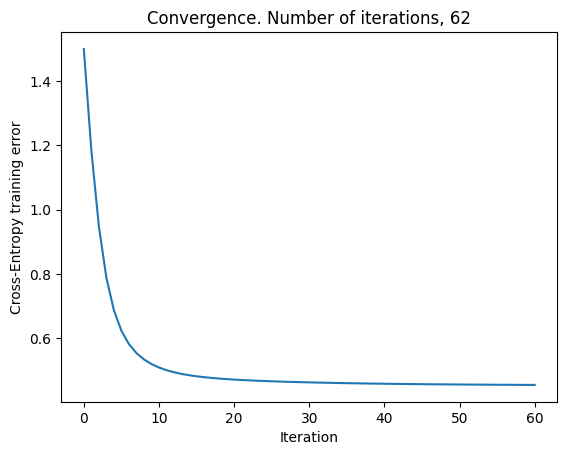

In [ ]:
# Accuracy of the Logistic Regression

# TODO
# Train the model
clf = my_GDClassifier(eps = 0.0001, max_iter = 1000, eta = 0.5, lam = 0)
clf.fit(X_train_scaled, y_train)
# Note that we had to change the learning rate for this different dataset
##############

print(f'The accuracy of the logistic regression on the training set is {clf.score(X_train_scaled, y_train)}')
plt.title(f'Convergence. Number of iterations, {clf.nb_iter}')
plt.plot(clf.training_error)
plt.xlabel('Iteration')
plt.ylabel('Cross-Entropy training error')

To compute the error in the validation set, we need to rescale the data as well.


In [ ]:
X_val_scaled = scaler.transform(X_val)
y_pred = clf.predict(X_val_scaled)
print(f'The accuracy of the logistic regression on the validation set is {(y_pred == y_val).mean()}')

The accuracy of the logistic regression on the validation set is 0.8044692737430168


### Learning rate, convergence and speed

In the following code, we will see how the choice of the learning rate parameter can affect the convergence and speed.

Learning rate 0.01 .Time taken to run: 21.474282297000173 . Number of iterations 835
Learning rate 0.1 .Time taken to run: 3.9904998950005393 . Number of iterations 249
Learning rate 1.0 .Time taken to run: 0.24298703000022215 . Number of iterations 31
Learning rate 10.0 .Time taken to run: 9.36259101900032 . Number of iterations 1000


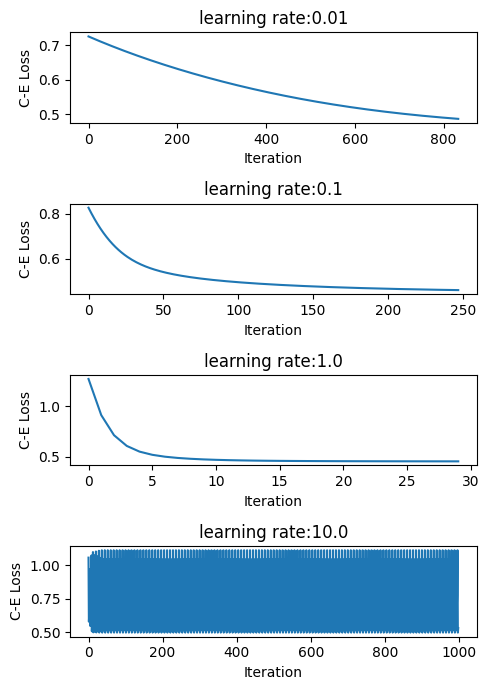

In [ ]:
nexp = 4
fig, axs = plt.subplots(nexp, figsize = (5,7))
vlr = np.logspace(-2,1,nexp)
for i in np.arange(nexp):
    lr = vlr[i]
    t1 = time.perf_counter()

    #TO DO
    #Train our model on the non augmented dataset with the corresponding
    # learning rate (lr) and max_iter = 1000
    clf = my_GDClassifier(eps = 0.0001, max_iter = 1000, eta = lr, lam = 0)
    clf.fit(X_train_scaled, y_train)

    #Assess performance
    t2 = time.perf_counter()
    print('Learning rate',lr,'.Time taken to run:',t2-t1,'. Number of iterations', clf.nb_iter)
    y_pred = clf.predict(X_val)
    axs[i].plot(clf.training_error,label = f'learning rate:{lr}')
    axs[i].set_title(f'learning rate:{lr}')
    axs[i].set_ylabel('C-E Loss')
    axs[i].set_xlabel('Iteration')

plt.tight_layout()


**Q6:** For which values of the learning rate we find convergence?

- For values of $\eta<1$. For values of $\eta<0.01$ convergence is very slow but eventually will converge. For $\eta=10$ there is oscillation and it does not converge.

**Q7:** Which value of the learning rate do you think is optimal?

- In this case, a value of $\eta=1$ appears optimal. Could also be that higher values lead to faster convergence.

# PART 3
## Stochastic Gradient Descent

Gradient Descent requires computing the gradient for each data point, which can be intractable for large-scale datasets.

Stochastic Gradient Descent (SGD) is a variant of gradient descent that helps us speed up the process by updating the weights with the gradient of **one single data point** (or a subset of them, also called **mini-batch**). *Stochastic* in plain terms means *random*. The way we introduce randomness in this process is by selecting the points that will count in that update randomly.

- Adapt your implementation of binary logistic regression using gradient descent to use mini-batches instead of full gradient updates. You need to do the following modifications:


1.   Add a new parameter `batch_size` to the constructor with default value set to 1 (this is done for you).
2.   In the `fit` method, instead of calling the method `gradient` passing the entire dataset `X` and `y`, use a random subset of `batch_size` data points only. You may check the function [np.random.choice](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html).
3.   You can keep calling the `cross_entropy_error` method using the entire dataset. In practice it is not really necessary, but we will do it to facilitate the visualization.



In [ ]:
class my_SGDClassifier():
    """
    Logistic Regression implemented with Gradient Descent.
    """

    def __init__(self, batch_size = 1, add_bias = True, lam = 0, max_iter = 1000, eps = 1e-8, eta = 1e-2):
        """
        Creates an instance of our my_GDClassifier model

        Parameters
        ----------
        max_iter: maximun number of iteration if convergence is not achieved.
        eps: sets the convergence criterion.
        eta: learning rate or step size.
        lam: weight controlling the regularizer, or lambda.
        """
        self.batch_size = batch_size
        self.add_bias = add_bias
        self.lam = lam
        self.max_iter = max_iter
        self.eps = eps
        self.eta = eta
        self.nb_iter = 1
        self.training_error = np.array([])
        self.n_samples = 0
        self.n_features = 0
        if add_bias:
          self.w = np.zeros([1, self.n_features + 1])[0]
        else:
          self.w = np.zeros([1, self.n_features])[0]

    def cross_entropy_error(self, X, y, w):
        """
        Computes the Cross-Entropy Loss Function
        Assumes bias is included in w

        Parameters
        ----------
        X: ndarray, shape (n_samples, n_features)
            The training set.
            n_samples == number of points in the dataset.
            n_features == dimension of the points.

        y: ndarray, shape (n_samples,)
            The class of each point (0: negative, 1: positive).
            n_samples == number of points in the dataset.

        w: ndarray, shape(1, n_features)

        Returns
        -------
        error: integer,
                The Cross-Entropy Loss
        """
        loglik = 0
        for n in range(X.shape[0]):
            yhat = sigmoid(w@X[n,:])

            # TODO
            # compute negative log-likelihood / cross-entropy error for this point
            loglik_n = y[n]*np.log(yhat+1e-9)+(1-y[n])*np.log(1-yhat+1e-9)
            # Note: the 1e-9 is added to avoid numerical errors

            loglik += loglik_n

        return -loglik/X.shape[0] + self.lam/2 * np.power(np.linalg.norm(w),2)

    def gradient(self, Xb, yb, w):
        """
        Computes the gradient of the objective function at point w using data set (X, y)
        Assumes Cross-Entropy and binary logistic regression model
        Assumes bias is included in w

        Parameters
        ----------
        X: ndarray, shape (n_samples, n_features)
            The training set.
            n_samples == number of points in the dataset.
            n_features == dimension of the points.

        y: ndarray, shape (n_samples,)
            The class of each point (0: negative, 1: positive).
            n_samples == number of points in the dataset.

        w: ndarray, shape(1, n_features)

        Returns
        -------
        grad: ndarray, shape (1, n_features)
                The gradient of the Cross-Entropy Loss Function
        """

        #initialize gradient
        grad = np.zeros([self.n_features+1])

        for n in range(Xb.shape[0]):
            yhat = sigmoid(w@Xb[n,:])

            gradient_n = (yhat-yb[n])*Xb[n,:]
            grad += gradient_n

        return grad/Xb.shape[0] + self.lam*w

    def fit(self, X, y):
        """
        Fit our Logistic Regression model to the data set (X, y)

        Parameters
        ----------
        X: ndarray, shape (n_samples, n_features)
            The training set.
            n_samples == number of points in the dataset.
            n_features == dimension of the points.
        y: ndarray, shape (n_samples,)
            The class of each point (0: negative, 1: positive).
            n_samples == number of points in the dataset.

        Returns
        -------
        self: logReg
               The Logistic Regression model trained on (X, y).
        """
        self.n_samples = X.shape[0]
        self.n_features = X.shape[1]
        if self.add_bias:
          X = np.hstack([np.ones((self.n_samples,1)),X])  # add dummy input
          self.w = np.random.randn(self.n_features + 1)
        else:
          self.w = np.random.randn(self.n_features)

        convergence = False  # start with cond greater than eps
        prev_error = np.Inf
        while (not convergence) and (self.nb_iter < self.max_iter):
            w_old = self.w

            #update weights
            ind = np.random.choice( np.arange(X.shape[0]), self.batch_size, replace=False)
            self.w = w_old - self.eta*self.gradient(X[ind], y[ind], w_old)

            #compute cross entropy error for this iteration and save it
            error = self.cross_entropy_error(X, y, self.w)

            self.training_error = np.append(self.training_error, error)
            self.nb_iter += 1

            #check convergence condition
            convergence = abs(error - prev_error) < self.eps
            prev_error = error

        return self

    def predict(self, X):
        """
        Predict the classes of points in X.

        Parameters
        ----------
        X: ndarray, shape (n_samples, n_features)
            The set of points whose classes are to predict.
            n_samples == number of points in the dataset.
            n_features == dimension of the points.
        Returns
        -------
        predictions: ndarray, shape (n_samples)
                      The predicted classes.
                      n_samples == number of points in the dataset.
        """
        if self.add_bias:
          X = np.hstack([np.ones((X.shape[0],1)),X])

        # return prediction of the model for given X data points
        prediction = np.reshape(sigmoid(self.w@X.T) > 0.5,(-1,))
        return prediction

    def score(self, X, y):
        """
        Compute the accuracy of the classifier on the set X, provided the ground-truth y.

        Parameters
        ----------
        X: ndarray, shape (n_samples, n_features)
            The set of points on which to compute the score.
            n_samples == number of points in the dataset.
            n_features == dimension of the points (e.g. each sample is in R^2).
        y: ndarray, shape (n_samples,)
            The ground-truth of the labels.
            n_samples == number of points in the dataset.
        Returns
        -------
        score: float
                Accuracy of the classifier.
        """
        if self.training_error.size == 0:
          print('train first!')
          return -1
        else:
          return np.mean(self.predict(X) == y)

The accuracy of the logistic regression on the training set is 0.8089887640449438
Convergence in : 500 iterations
The accuracy of the logistic regression on the validation set is 0.8100558659217877


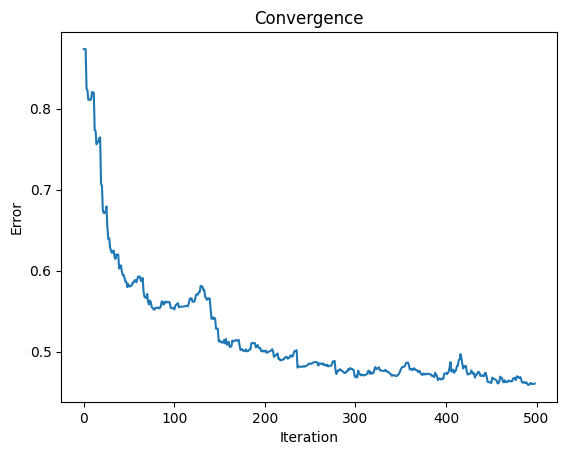

In [ ]:
# TO DO____________________
# Train the logistic regression model on the scaled data with parameters:
# Learning rate: 0.1
# Convergence condition (eps): 1e-8
# Maximum number of iterations: 500
# Choose different values for the batch size parameter and see what happens
clf = my_SGDClassifier(batch_size=2, eps = 1e-8, max_iter = 500, eta = .1, lam = 0)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_val_scaled)

plt.title('Convergence')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.plot(clf.training_error,label=f'Batch size: 0.1')
print(f'The accuracy of the logistic regression on the training set is {clf.score(X_train_scaled,y_train)}')
print('Convergence in :',clf.nb_iter,'iterations')
print(f'The accuracy of the logistic regression on the validation set is {(y_pred == y_val).mean()}')


Now that we got a sense of how it affects, let's study it more rigorously and sweep the space of possibilities for the mini-batch sizes. Typically, the size of the minibatch is a power of $2$, for hardware reasons.

We will set the value of $\epsilon$ sufficiently small ($\epsilon=10^{-8}$) to analyze the curve for `max_iter` iterations.

The accuracy of the logistic regression on the training set is 0.7949438202247191
The accuracy of the logistic regression on the validation set is 0.776536312849162
The accuracy of the logistic regression on the training set is 0.7851123595505618
The accuracy of the logistic regression on the validation set is 0.8156424581005587
The accuracy of the logistic regression on the training set is 0.7991573033707865
The accuracy of the logistic regression on the validation set is 0.8044692737430168
The accuracy of the logistic regression on the training set is 0.7794943820224719
The accuracy of the logistic regression on the validation set is 0.8100558659217877


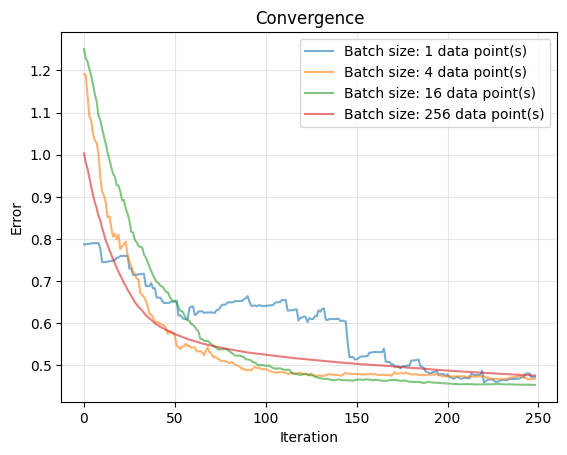

In [ ]:
batch_sizes = []
n_iters = []

for size in [1,4,16,256]:

  # TO DO____________________
  # Train the logistic regression model on the scaled data as before, with the iterating size values
  clf = my_SGDClassifier(batch_size=size, eps = 1e-8, max_iter = 250, eta = .1, lam = 0)
  clf.fit(X_train_scaled, y_train)
  y_pred = clf.predict(X_val_scaled)

  plt.plot(clf.training_error,label=f'Batch size: {size} data point(s)',alpha = 0.6)
  batch_sizes.append(round(size*X_train_scaled.shape[0]))
  n_iters.append(clf.nb_iter)
  print(f'The accuracy of the logistic regression on the training set is {clf.score(X_train_scaled,y_train)}')
  #print('Convergence in :',clf.nb_iter,'iterations')
  print(f'The accuracy of the logistic regression on the validation set is {(y_pred == y_val).mean()}')

plt.title('Convergence')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.grid(color=[.9,.9,.9])
plt.legend()

Ploting training error against number of iteration is not giving a fair comparison of the speed of the algorithm with different batch sizes. Indeed at each iteration, with `batch size=1`, you only see one new datapoint, while with `batch_size=256`, you see 256 new data points. To remedy that, we will plot the training error against the number of points seen by the algorithm.

The accuracy of the logistic regression on the training set is 0.7949438202247191
The accuracy of the logistic regression on the validation set is 0.8044692737430168
The accuracy of the logistic regression on the training set is 0.7879213483146067
The accuracy of the logistic regression on the validation set is 0.8100558659217877
The accuracy of the logistic regression on the training set is 0.7907303370786517
The accuracy of the logistic regression on the validation set is 0.7932960893854749
The accuracy of the logistic regression on the training set is 0.651685393258427
The accuracy of the logistic regression on the validation set is 0.6480446927374302


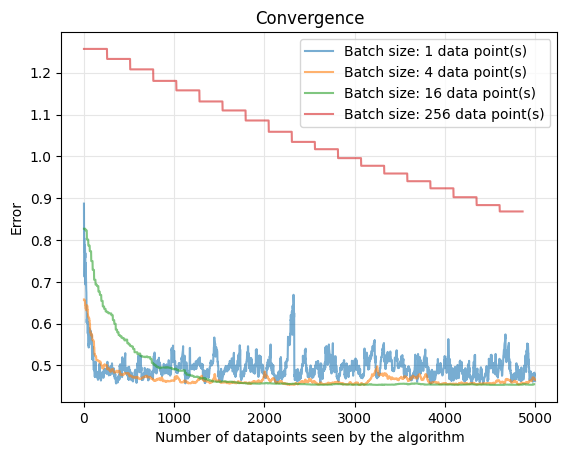

In [ ]:
batch_sizes = []
n_iters = []
n_points = 5000

for size in [1,4,16,256]:

  # TO DO____________________
  # Train the logistic regression model on the scaled data as before, with the iterating size values
  clf = my_SGDClassifier(batch_size=size, eps = 1e-8, max_iter = n_points //size + 1, eta = .1, lam = 0)
  clf.fit(X_train_scaled, y_train)
  y_pred = clf.predict(X_val_scaled)

  error_history = [clf.training_error[i//size] for i in range(len(clf.training_error)*size-1)]
  plt.plot(error_history, label=f'Batch size: {size} data point(s)',alpha = 0.6)
  batch_sizes.append(round(size*X_train_scaled.shape[0]))
  n_iters.append(clf.nb_iter)
  print(f'The accuracy of the logistic regression on the training set is {clf.score(X_train_scaled,y_train)}')
  #print('Convergence in :',clf.nb_iter,'iterations')
  print(f'The accuracy of the logistic regression on the validation set is {(y_pred == y_val).mean()}')

plt.title('Convergence')
plt.xlabel('Number of datapoints seen by the algorithm')
plt.ylabel('Error')
plt.grid(color=[.9,.9,.9])
plt.legend()

**Q8:** What happens when we use very few points for the SGD update?

- For a batch size of $1$ the error curve is too noisy. It is difficult to guess if the algorithm converged or not. The error curve becomes smoother as the batch size increase. For relatively small sizes ($4$ data points) the curve looks very good. For a batch size of $256$ we observe no difference between using batches or the entire dataset.

**Q9:** Is there any advantage of using less points than the total size of the training dataset?

- Yes, we do not need to compute the gradient for all the $N$ points in the dataset to have a robust estimate of the gradient. With only a few samples ($4$) we can reliably estimate the gradient.